# Exercises for Introduction to Quantum Computing

Name: Pugazharasu Anancia Devaneyan (s6puanan) <br />
Matriculation number: 3300280

In [48]:
%pip install qiskit-ibm-provider

     ------------------------------------ 233.8/233.8 kB 955.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Importing the required libraries
import matplotlib.pyplot as plt
import math
import numpy as np
from math import pi
import qiskit as qi
from qiskit import IBMQ, BasicAer, Aer, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram
from qiskit_ibm_provider import IBMProvider
from qiskit.circuit.library import QFT

# 1 Quantum Simulation on Quantum Hardware

a) We know that,
$$e^{-i \omega t A \otimes B} =  ( \mathbb{I}_{n} \otimes \mathbb{I}_{n}) \cdot \cos (\omega t) - i \sin (\omega t) \cdot ( A \otimes B)$$ 
holds true for all 
$$A^{2} = B^{2} = \mathbb{I}_{n}$$
where $n = dim(A)$. Thus, given the Hamiltonian,
$$H=X_0 \otimes Y_1$$
the unitary representing this time evolution for a small timestep $\delta t$ is given by,
$$U = e^{- i \delta t H}$$
$$U = e^{- i \delta t (X_{0} \otimes Y_{1})}$$
$$U = ( \mathbb{I}_{n} \otimes \mathbb{I}_{n}) \cdot \cos (\delta t) - i \sin (\delta t) \cdot ( X_{0} \otimes Y_{1})$$
writing this out as matrix elements, we have:
$$U =\cos (\delta t) \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix} - i \sin (\delta t) \begin{pmatrix} 0 & 0 & 0 & -i \\ 
0 & 0 & i & 0 \\ 0 & -i & 0 & 0 \\ i & 0 & 0 & 0 \end{pmatrix} $$
$$U = \begin{pmatrix} \cos (\delta t) & 0 & 0 & -\sin (\delta t) \\ 0 & \cos (\delta t) & \sin (\delta t) & 0 \\ 0 & -\sin (\delta t) & \cos (\delta t) & 0 \\ \sin (\delta t) & 0 & 0 & \cos (\delta t) \end{pmatrix}$$
This resembles the $X$ and $Y$ rotation gates, which are of the form,
$$R_{X}(\theta)=\exp \left(-i \frac{\theta}{2} X\right) = \begin{pmatrix} \cos(\frac{\theta}{2}) & -i\sin(\frac{\theta}{2}) \\ -i\sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \end{pmatrix}$$
$$R_{Y}(\theta)=\exp \left(-i \frac{\theta}{2} Y\right) = \begin{pmatrix} \cos(\frac{\theta}{2}) & -\sin(\frac{\theta}{2}) \\ \sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \end{pmatrix}$$
Thus, our quantum circuit to implement the Hamiltonian is simply given by the unitary,
$$U = R_{X}(\theta) \otimes R_{Y} (\theta)$$
where, $ \theta = 2 \times \delta t$

b) We will now implement a quantum circuit on Qiskit for the Hamiltonian from (a)

In [13]:
i = 0 + 1j
X = np.array([[0,1],[1,0]],dtype=np.complex_)
Y = np.array([[0, 0 -i],[i,0]],dtype=np.complex_)
D = np.kron(X,Y)
display(D)
print(np.shape(D))

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j],
       [0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
       [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j]])

(4, 4)


In [15]:
vect = np.array([[1],[0],[0],[0]])
ans = np.matmul(D,vect)
display(ans)

array([[0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+1.j]])

In [5]:
def hammy(t):
    t *= 2
    qc = QuantumCircuit(2,2)
    qc.p(-np.pi/2,1)
    qc.h(1)
    qc.h(0)
    qc.rzz(t,0,1)
    qc.s(1)
    qc.h(0)
    qc.h(1)
    qc.measure(0,0)
    qc.measure(1,1)
    return qc

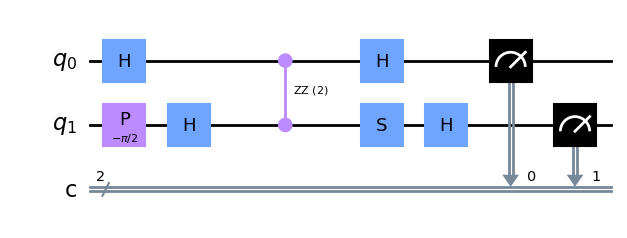

In [6]:
delta_t = 1
circuit = hammy(delta_t)
circuit.draw('mpl')

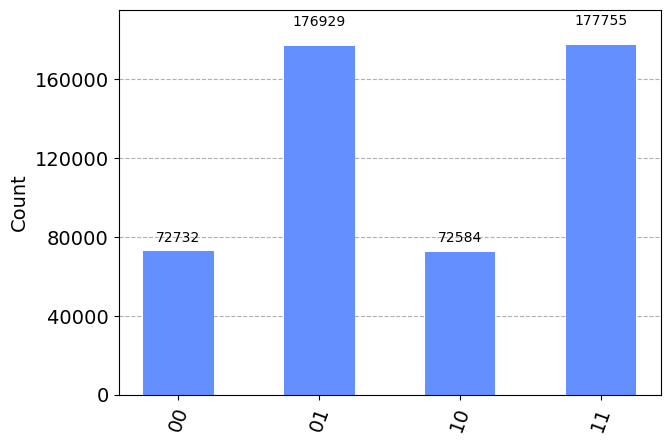

In [10]:
answer = execute(circuit, backend=BasicAer.get_backend('qasm_simulator'), shots=500000).result().get_counts()
plot_histogram(answer)

In [27]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(circuit, backend)
result = job.result()

state_vector = result.get_statevector()
data = result.data()
#psi1 = data[0]
#psi2 = data['psi2']
print(data)
#display(state_vector.draw(output = 'latex'))
#display(psi2.draw(output = 'latex'))
# Print the statevector
print(state_vector)

{'counts': {'0x0': 1}, 'statevector': array([0.70710678+0.70710678j, 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ])}
[0.70710678+0.70710678j 0.        +0.j         0.        +0.j
 0.        +0.j        ]


If we have the initial state,
$$|\psi(0)\rangle=|00\rangle$$

In [23]:
state = qi.quantum_info.Statevector.from_label('00')
state.draw(output='latex')

<IPython.core.display.Latex object>

we have the final state,

In [24]:
state = state.evolve(circuit)
state.draw(output='latex')

<IPython.core.display.Latex object>

Let's now simulate this using the 'statevector_simulator' in Qiskit

{'counts': {'0x0': 1}, 'statevector': array([2.91926582e-01+0.j        , 2.78392046e-17-0.45464871j,
       4.54648713e-01+0.j        , 4.33569923e-17-0.70807342j])}
[2.91926582e-01+0.j         2.78392046e-17-0.45464871j
 4.54648713e-01+0.j         4.33569923e-17-0.70807342j]


In [34]:
shots = 1000
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(circuit, shots=shots)
counts_statevector = job_statevector.result()#.get_counts()
#plot_histogram(counts_statevector)
print(counts_statevector)

Result(backend_name='aer_simulator_statevector', backend_version='0.12.0', qobj_id='', job_id='659e1a72-4a6d-4894-9466-cc10997578ac', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 522, '0x0': 96, '0x2': 184, '0x1': 198}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=2, name='circuit-125', qreg_sizes=[['q', 2]]), status=DONE, seed_simulator=1431322735, metadata={'batched_shots_optimization': False, 'method': 'statevector', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'sample_measure_time': 0.0005768, 'input_qubit_map': [[0, 0], [1, 1]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'fusion': {'enabled': True, 'threshold': 14, 'max_fused_qubits': 5, 'applied': False}}, time_taken=0.0036944)], date=2023-06-25T17:57:22.326488, status=COMPLETED, 

c) We will now attempt to do the same computation in (b) but in a real, noisy quantum computer!

In [2]:
IBMProvider.save_account(token='6adec1fdf68a11d42499c8c968e334b42dfe00e3c065409caada0f56f0a5c5118572aea9e997eed1751341e5092ac7e3cff6202b84a810a1988e1e4622987c48')

In [3]:
provider = IBMProvider()
device_list = provider.backends()
for dev in device_list:
    print(dev.name + ':_' + str(dev.configuration().n_qubits) + '_qubits')

ibmq_lima:_5_qubits
ibmq_belem:_5_qubits
simulator_mps:_100_qubits
simulator_statevector:_32_qubits
simulator_stabilizer:_5000_qubits
ibm_lagos:_7_qubits
ibmq_qasm_simulator:_32_qubits
simulator_extended_stabilizer:_63_qubits
ibmq_manila:_5_qubits
ibm_nairobi:_7_qubits
ibm_perth:_7_qubits
ibmq_jakarta:_7_qubits
ibmq_quito:_5_qubits


In [11]:
num_shots_hardware = 500000
hardware_backend = provider.get_backend('ibmq_belem')
job = execute(circuit,backend=hardware_backend , shots=num_shots_hardware )


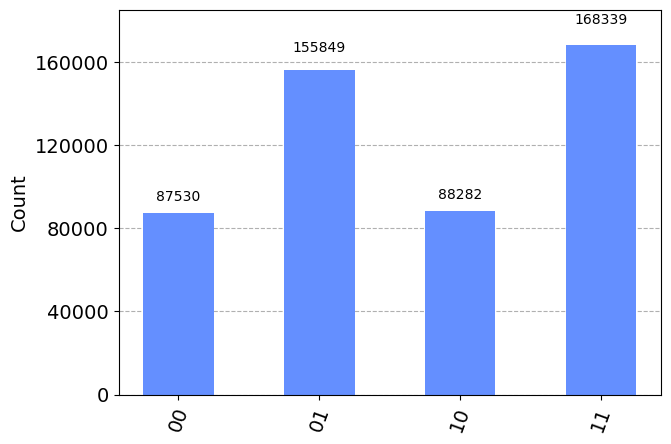

In [12]:
counts = job.result().get_counts()
plot_histogram(counts)

We can also use a classical simulator which can simulate the nosie on a quantum device in order to do this computation.

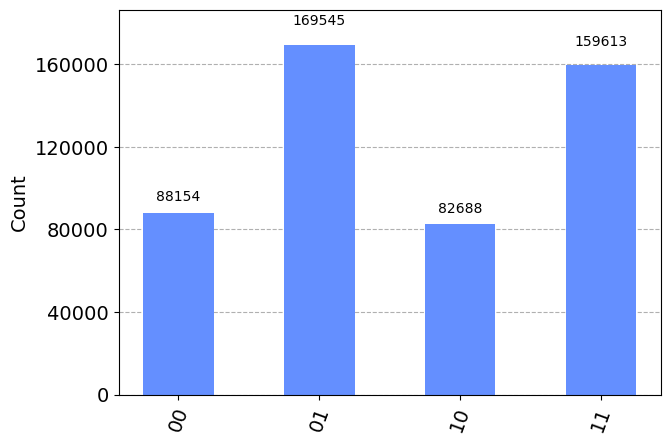

In [35]:
from qiskit.providers.fake_provider import FakeQuitoV2
num_shots_hardware = 500000
hardware_backend = FakeQuitoV2()
job = execute(circuit, backend=hardware_backend, shots = num_shots_hardware)
counts = job.result().get_counts()
plot_histogram(counts)

# 2 Pauli Measurements

a) The unitary transformation such that the final state of the circuit is an eigenstate of the Pauli operator that the unitary is supossed to represent is given by, for the case of the Pauli $Z$ operator,
$$U_{1} := Z$$
for the case of the Pauli $X$ operator,
$$U_{2} := H$$
for the case of the Paul $Y$ operator,
$$U_{3} := H \cdot S^{\dagger}$$

b) Now to generalize from the single-qubit case, we will consider a few cases for two-qubits. The respective unitary transformations $U_{i}$ for the circuit are given by the table below:
<center>

| Tables   |      Are      |  Cool |
|----------|:-------------:|------:|
| col 1 is |  left-aligned | $1600 |
| col 2 is |    centered   |   $12 |
| col 3 is | right-aligned |    $1 |

</center>

In [5]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

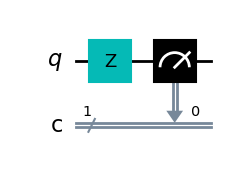

In [6]:
evo = QuantumCircuit(1,1)
evo.z(0)
evo.measure(0,0)
evo.draw('mpl')

In [8]:
shots = 1000
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(evo, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)
print(counts_statevector)

{'0': 1000}


In [ ]:
state = qi.quantum_info.Statevector.from_label('1')
state.draw(output='latex')